In [1]:
import torch
from torch_geometric.data import Data
import os

os.environ['TORCH'] = torch.__version__

# 这行代码意思是将环境变量中名为'TORCH'的变量设为当前正在运行的PyTorch版本号。

# 具体来说，os.environ 是Python内置的一个标准库，它提供了一个字典类型的接口，用于访问操作系统的环境变量。
# 在这个例子中，os.environ 字典中的 'TORCH' 键被设置为了 torch.__version__ 的值，即当前安装的PyTorch库的版本号。

# 这行代码的目的可能是在代码运行时检查当前系统中安装的PyTorch版本，并将其保存到环境变量中，以便其他代码可以轻松地访问该信息。

print('torch version:', torch.__version__)

torch version: 1.13.1+cu116


In [2]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
data

Data(x=[3, 1], edge_index=[2, 4])

In [3]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
data

Data(x=[3, 1], edge_index=[2, 4])

In [4]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [5]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}') # 4个节点有标签
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}') # 孤立节点
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}') # 无向图

print(type(data))

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True
<class 'torch_geometric.data.data.Data'>


In [6]:
edge_index = data.edge_index
print(edge_index)

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [7]:
print(edge_index.t())  # 转置

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [8]:
from torch_geometric.utils import to_dense_adj
adj = to_dense_adj(edge_index)  # 转换成邻接矩阵

print(adj.shape)
print(adj)

torch.Size([1, 34, 34])
tensor([[[0., 1., 1.,  ..., 1., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 1., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 1., 1.],
         [0., 0., 1.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 1., 1., 0.]]])


In [9]:
print(data.y)

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


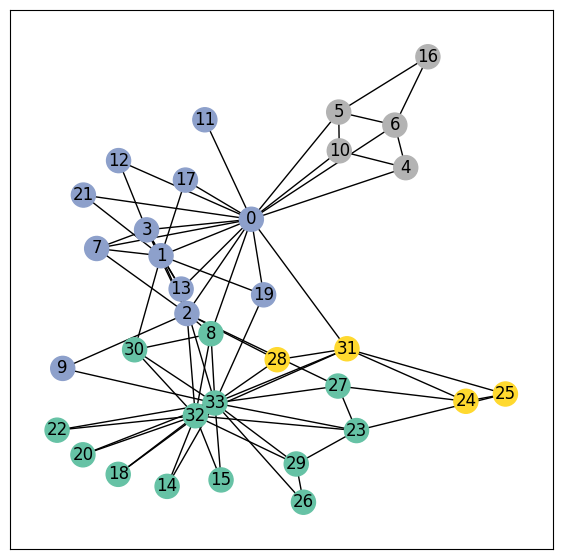

In [10]:
# 可视化图
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(G, color):
    plt.figure(figsize=(7,7)) # (7, 7)的画布
    plt.xticks([]) # x轴刻度
    plt.yticks([]) # y轴刻度
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True, node_color=color, cmap="Set2")

#     其中，G 是一个 NetworkX 图形对象，它可以是一个无向图或有向图。
#     pos 参数表示节点的布局位置，它可以是一个字典，指定每个节点的坐标位置，
#     也可以是一个函数，用于自动计算节点的坐标位置。
#     在这个例子中，使用 nx.spring_layout(G, seed=42) 函数自动计算节点的坐标位置，
#     其中 seed 参数用于指定随机数种子，以确保结果可重复。
#     with_labels 参数表示是否在节点上显示标签，默认为 False，即不显示标签。
#     node_color 参数表示节点的颜色，可以是一个单一的颜色值，也可以是一个颜色列表，指定每个节点的颜色。
#     在这个例子中，使用了一个颜色列表 color，它与节点数量相同，表示每个节点的颜色。
#     cmap 参数表示使用的颜色映射，用于将节点颜色映射到颜色列表中的颜色。在这个例子中，使用了颜色映射 "Set2"。

    plt.show()

from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)

# to_networkx(data, to_undirected=True) 是 NetworkX 库中用于将图形数据转换为 NetworkX 图形对象的函数之一。
# 其中，data 参数是要转换的数据，它可以是多种格式，如邻接矩阵、边列表、邻接列表等等。
# 具体来说，如果 data 是邻接矩阵，则需要使用 nx.from_numpy_matrix() 函数；
# 如果 data 是边列表或邻接列表，则可以使用 nx.from_edgelist() 或 nx.from_adjacency_list() 函数。

visualize_graph(G, color=data.y)

In [11]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
#         torch.manual_seed(1234)
#         torch.manual_seed(1234)的作用是设置随机数生成器的种子(seed)为1234，
#         以确保随机数生成器生成的随机数序列是可重复的。
#         在使用深度学习模型时，通常需要随机初始化模型参数、划分数据集等操作，这些操作都需要使用随机数。
#         设置种子可以确保每次程序运行时生成的随机数序列都是相同的，
#         这样可以使得实验的结果更加可重复，便于调试和比较不同模型的性能。
#         在 PyTorch 中，随机数生成器有多个，包括全局随机数生成器和每个模块自己的随机数生成器。
#         使用 torch.manual_seed() 可以设置全局随机数生成器的种子，而对于每个模块自己的随机数生成器，
#         可以通过创建一个新的 torch.Generator 对象并设置其种子来实现随机数的可重复性。

        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [12]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()

#     这行代码的作用是将张量h从计算图中分离（detach），并将其转换为NumPy数组（numpy()），最后将其从所在设备中移动到CPU上（cpu()）。
#     分离操作是将张量从当前计算图中分离出来，使得该张量的计算不会对计算图中其他节点的梯度传播产生影响。
#     这通常用于获取模型的中间输出，以便进行后续的计算和处理，而不会影响模型的反向传播。
#     转换为NumPy数组则是将张量对象转换为NumPy数组对象，以便进行各种NumPy操作。
#     将其从设备上移动到CPU上，则是将张量从GPU等计算设备上转移到CPU上，以便进行后续的操作或输出。

    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2") # 散点图：取第0列；取第一列。散点大小140
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16) # 字体大小16
    plt.show()

tensor([[-0.0262,  0.0731],
        [-0.0336,  0.0555],
        [-0.0248,  0.0332]], grad_fn=<SliceBackward0>)
Embedding shape: [34, 2]


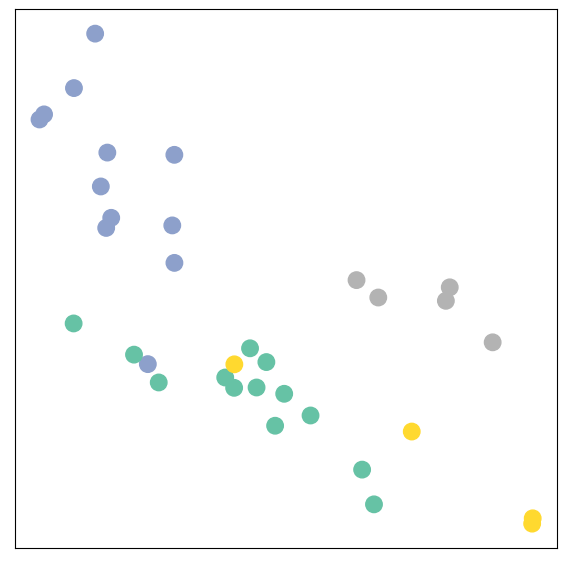

In [13]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(h[0:3])
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

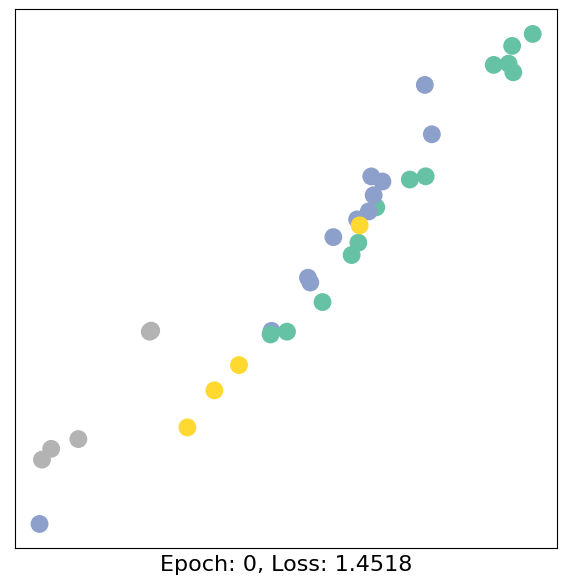

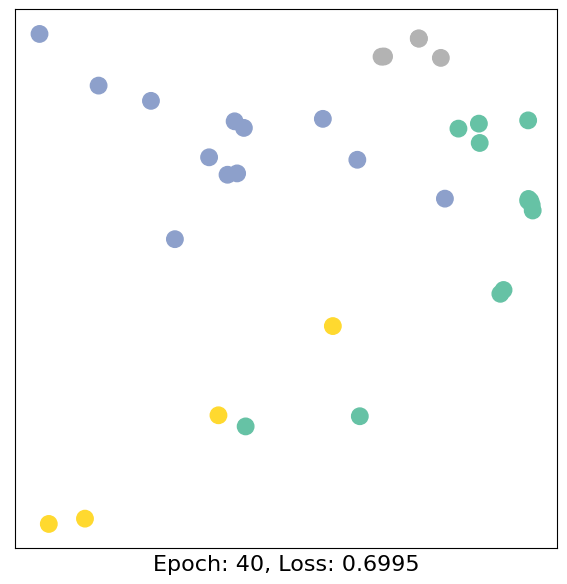

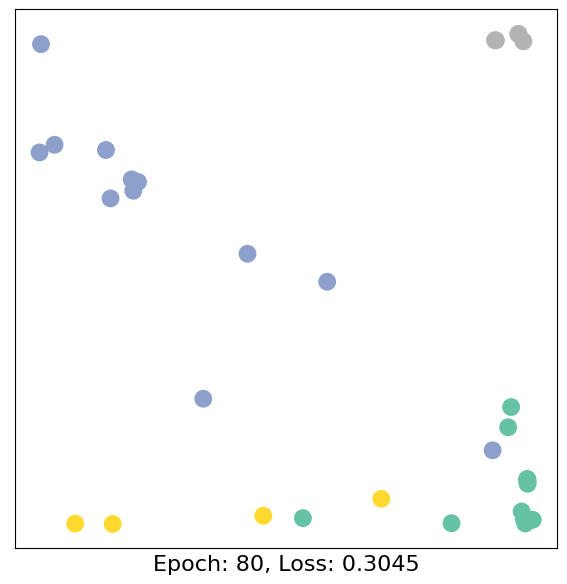

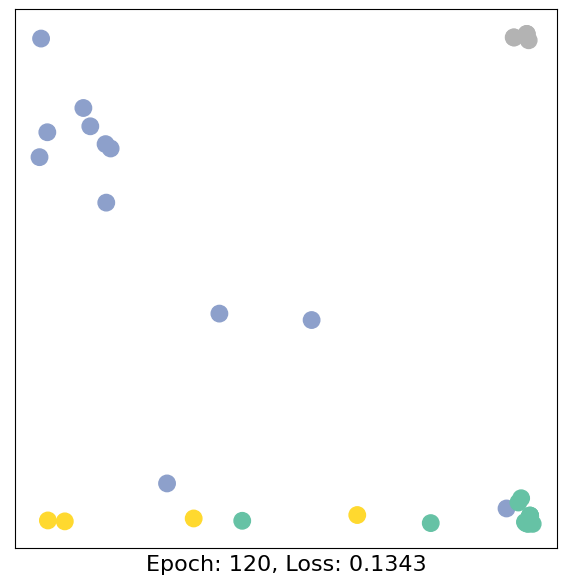

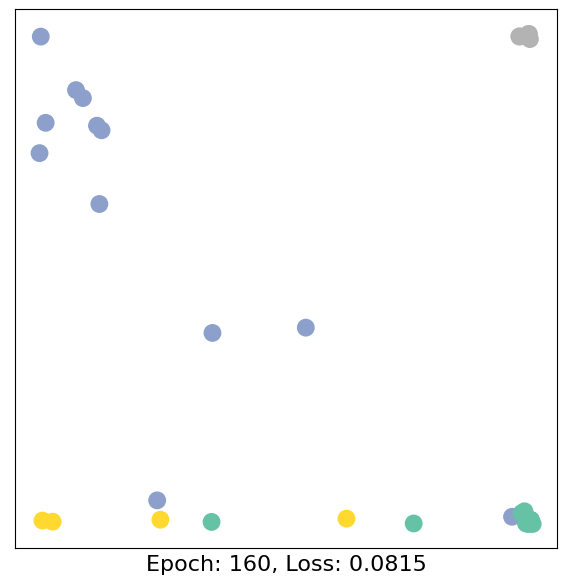

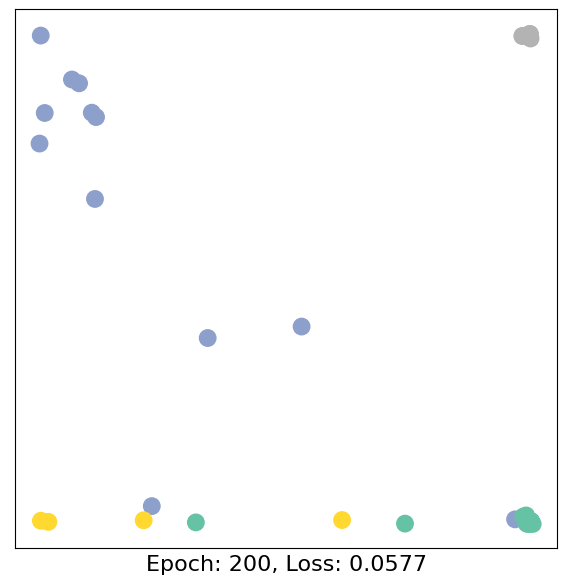

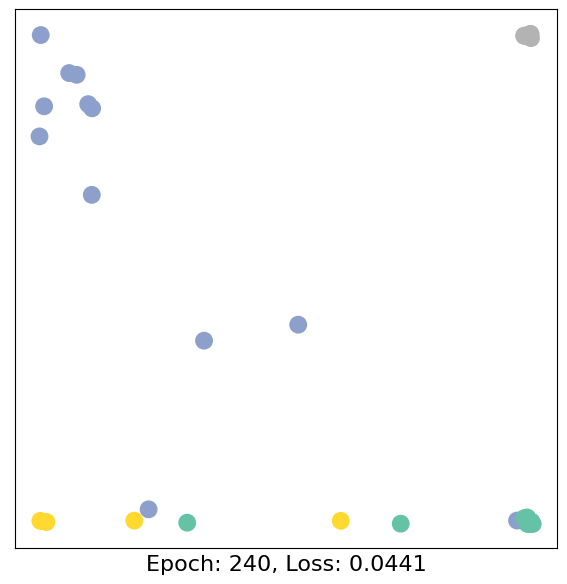

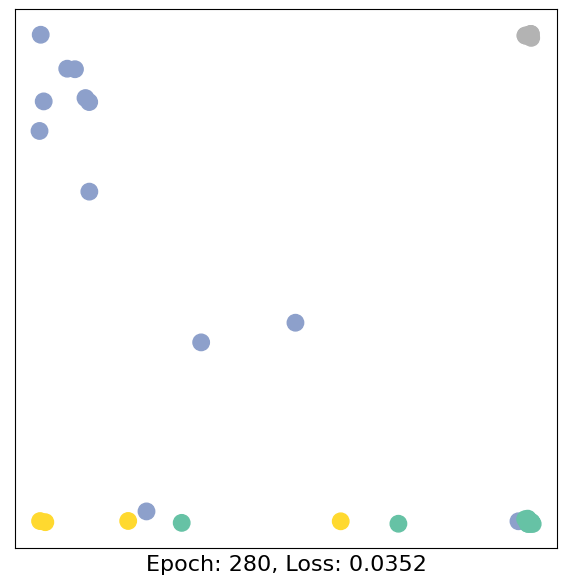

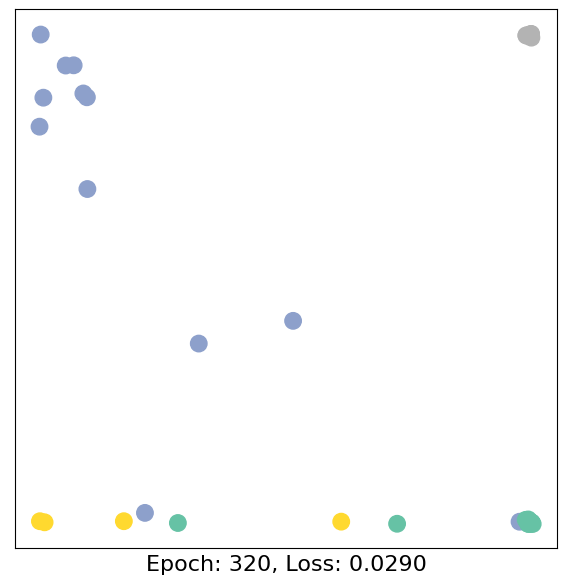

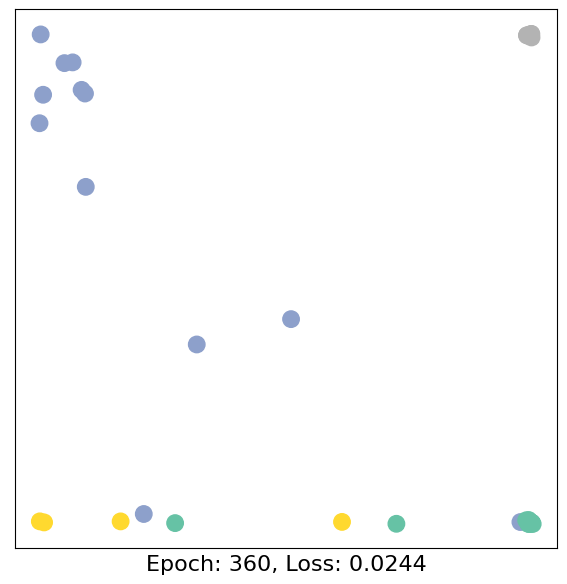

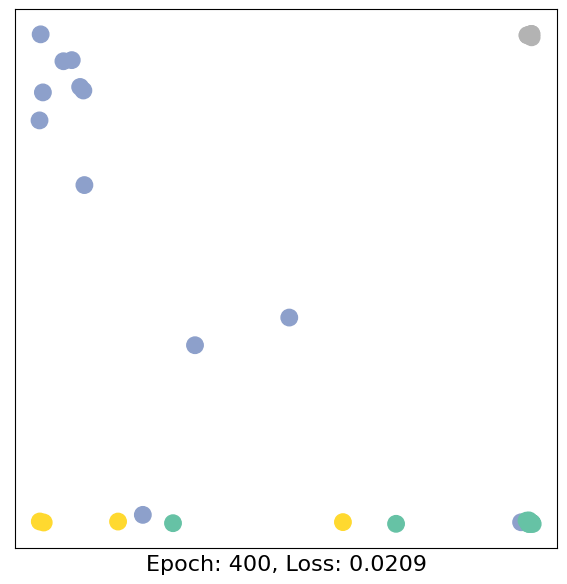

In [14]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 40 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
